# 10. Logistic Regression

## 10.3 Multinomial logistic regression

### 10.3.1 Linear and nonlinear classifiers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

N = 100
cov = 0.01 * np.eye(2)
means = [
    [0.5, 0.5], [-0.5, -0.5], # class 1
    [0.5, -0.5], [-0.5, 0.5], # class 2
    [0.0, 0.0] # class 3
]
X = np.concatenate([np.random.multivariate_normal(m, cov, size=N) for m in means])
y = np.ravel(np.transpose(np.array([1, 1, 2, 2, 3]) * np.ones((100, 1))))
n_classes = len(np.unique(y))
X.shape, y.shape, n_classes

((500, 2), (500,), 3)

#### Figure 10.7: Example of 3-class logistic regression with 2d inputs. (a) Original features. (b) Quadratic features.

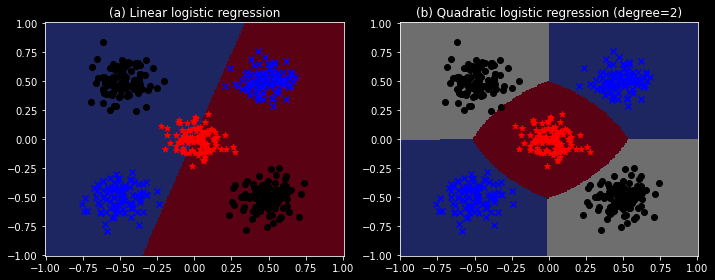

In [3]:
def plotScatter(X0, X1, y, ax):
    for x0, x1, cls in zip(X0, X1, y):
        colors = ['blue', 'black', 'red']
        markers = ['x', 'o', '*']
        color = colors[int(cls) - 1]
        marker = markers[int(cls) - 1]
        ax.scatter(x0, x1, marker=marker, color=color)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

clf = LogisticRegression(C=1.0)
transformer = PolynomialFeatures(2)

n_grid = 200
xx, yy = np.meshgrid(np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid))
grid = np.c_[xx.ravel(), yy.ravel()]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# Linear logistic regression
clf.fit(X, y)
Z = clf.predict(grid).reshape(xx.shape)
ax1.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.5)

# Quadratic logistic regression
clf.fit(transformer.fit_transform(X)[:, 1:], y) # skip the constant term
Z = clf.predict(transformer.transform(grid)[:, 1:]).reshape(xx.shape)
ax2.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.5)

# https://stackoverflow.com/questions/40601997/setting-discrete-colormap-corresponding-to-specific-data-range-in-matplotlib
# cmap = plt.cm.get_cmap("jet", lut=nclasses)
# cmap_bounds = np.arange(nclasses+1) - 0.5
# norm = mcol.BoundaryNorm(cmap_bounds, cmap.N)
# plt.pcolormesh(xx, yy, Z, cmap=cmap, norm=norm)

plotScatter(X[:, 0], X[:, 1], y, ax1)
plotScatter(X[:, 0], X[:, 1], y, ax2)
ax1.set_title('(a) Linear logistic regression')
ax2.set_title('(b) Quadratic logistic regression (degree=2)')

fig.tight_layout()